In [3]:
import numpy as np
import tensorflow as tf
import cv2
import imghdr
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-03-31 14:34:36.607410: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(len(physical_devices))

1


2023-03-31 14:35:20.037931: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-31 14:35:20.137712: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-31 14:35:20.574120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-31 14:35:20.574398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2023-03-31 14:35:20.574452: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-31 14:35:23.465948: I tensorflow/stream_executor/platform/def

In [5]:
image_exts = ['jpeg','jpg','png']
train_path = '/home/boruto/Documents/GTU_internship/projects/project1/dataset/Plant_Diseases_Dataset/train'
valid_path = '/home/boruto/Documents/GTU_internship/projects/project1/dataset/Plant_Diseases_Dataset/valid'
for image_class in os.listdir(train_path): 
    for image in os.listdir(os.path.join(train_path, image_class)):
        image_path = os.path.join(train_path, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [6]:
datagen_for_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=.2,
    height_shift_range=.2
)
datagen_for_test = ImageDataGenerator(
    rescale = 1./255
)

In [7]:
data_train = datagen_for_train.flow_from_directory(train_path,target_size=(256,256),batch_size=32,class_mode='categorical') 
data_val = datagen_for_test.flow_from_directory(valid_path,target_size=(256,256),batch_size=32,class_mode='categorical')

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


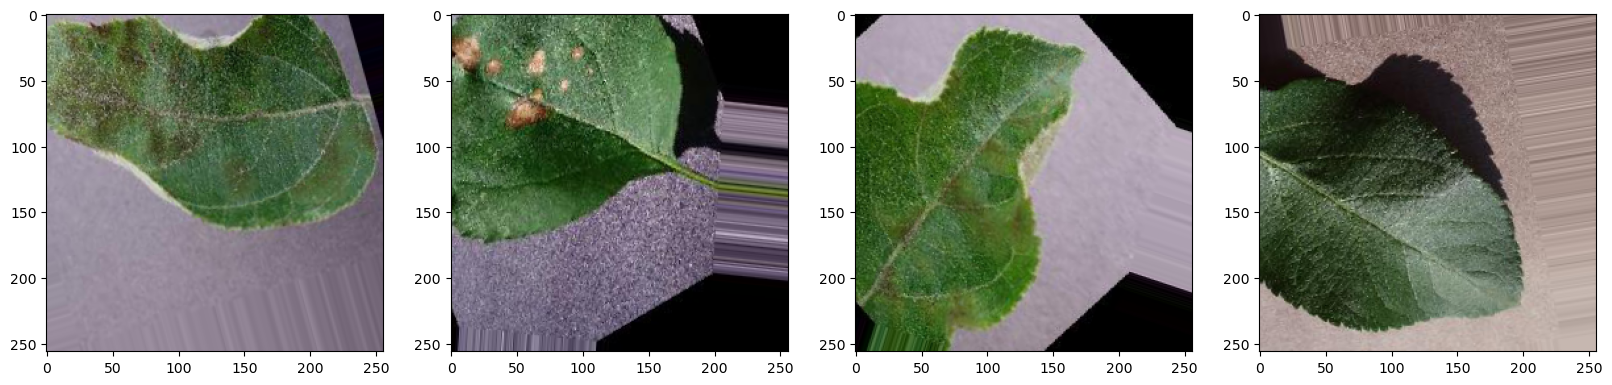

In [8]:
import matplotlib.pyplot as plt
batch = next(data_train)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    #ax[idx].title.set_text(class_names[batch[1][idx]])

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

2023-03-31 14:36:02.421949: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 14:36:02.422822: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-31 14:36:02.423125: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-31 14:36:02.423333: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43Gi

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

In [11]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
hist = model.fit_generator(data_train,validation_data=data_val,epochs=20,callbacks=callbacks,steps_per_epoch=len(data_train),validation_steps=len(data_val),shuffle=True)

/home/boruto/anaconda3/envs/env/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2023-03-31 14:36:22.788027: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-31 14:36:22.788642: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800500000 Hz


Epoch 1/20


2023-03-31 14:36:24.303200: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-31 14:36:27.246691: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-03-31 14:36:36.962465: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-03-31 14:36:37.026788: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


243/243 [==============================] - 411s 2s/step - loss: 2.9180 - accuracy: 0.6365 - val_loss: 39.5197 - val_accuracy: 0.2265
Epoch 2/20
243/243 [==============================] - 455s 2s/step - loss: 0.8023 - accuracy: 0.7842 - val_loss: 5.1134 - val_accuracy: 0.4920
Epoch 3/20
243/243 [==============================] - 398s 2s/step - loss: 0.4628 - accuracy: 0.8545 - val_loss: 0.6136 - val_accuracy: 0.8291
Epoch 4/20
243/243 [==============================] - 125s 513ms/step - loss: 0.3475 - accuracy: 0.8913 - val_loss: 0.5802 - val_accuracy: 0.7962
Epoch 5/20
243/243 [==============================] - 138s 569ms/step - loss: 0.2554 - accuracy: 0.9158 - val_loss: 0.4265 - val_accuracy: 0.8888
Epoch 6/20
243/243 [==============================] - 165s 679ms/step - loss: 0.1965 - accuracy: 0.9375 - val_loss: 0.3903 - val_accuracy: 0.8497
Epoch 7/20
243/243 [==============================] - 164s 675ms/step - loss: 0.1861 - accuracy: 0.9373 - val_loss: 0.9012 - val_accuracy: 0.72

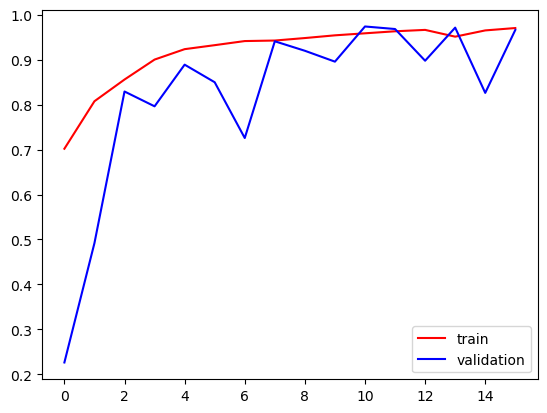

In [14]:
plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

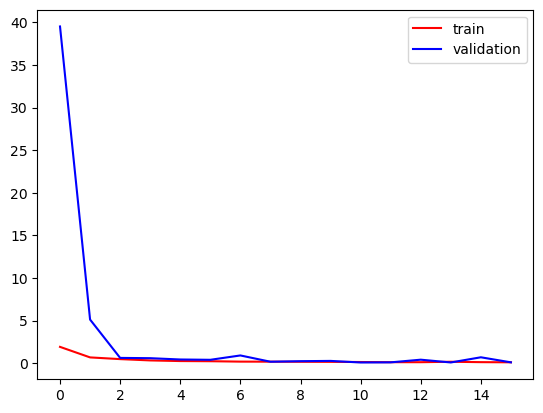

In [15]:
plt.plot(hist.history['loss'],color='red',label='train')
plt.plot(hist.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [1]:
import cv2
from  tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = load_model('apple_leaf.h5')

2023-04-06 23:49:04.050500: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-06 23:49:16.451797: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-06 23:49:16.453875: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-06 23:49:16.537197: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-04-06 23:49:16.537375: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Arch
2023-04-06 23:49:16.537443: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Arch
2023-04-06 23:49:16.537963: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 530.41.3
2023-04-06 23:49:16.538175: I tensorflow/stream_executor/cuda/cuda_dia

In [3]:
datagen_for_test = ImageDataGenerator(
    rescale = 1./255
)
valid_path = '/home/boruto/temp/test/'
#valid_path = '/home/boruto/Documents/GTU_internship/projects/project1/dataset/Plant_Diseases_Dataset/valid'
data_val = datagen_for_test.flow_from_directory(valid_path,target_size=(256,256),batch_size=32,class_mode='categorical')

Found 1 images belonging to 4 classes.


In [10]:
temp_data,temp_lab = next(data_val)

In [61]:
import numpy as np
print('actual value')
y_hat = np.argmax(temp_lab,axis=1)
y_pred = np.argmax(model.predict(temp_data),axis=1)
np.square(np.m)

actual value
[3 0 2 0 1 1 2 1 3 1 1 0 2 3 2 0 1 1 1 3 1 3 1 0 2 0 0 1 2 2 0 2]


array([3, 0, 2, 0, 1, 1, 2, 1, 3, 1, 1, 0, 2, 3, 2, 0, 1, 1, 1, 3, 1, 3,
       1, 0, 2, 0, 0, 1, 2, 2, 0, 2])

In [11]:
import numpy as np

img = cv2.imread(temp_path)
img = cv2.resize(img,(256,256))
img = img/255
img = img.reshape(1,256,256,3)
np.argmax(model.predict(img))

1

In [7]:
import numpy as np
np.argmax([4,21,1,9])

1